<a href="https://colab.research.google.com/github/rayPriyanka1/Research-Through-Data-Science/blob/main/DAY%207/Heart_Disease_Prediction_Using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve,roc_auc_score, auc, RocCurveDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')

Mounted at /content/drive


In [ ]:
# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nCheck for missing values:")
print(df.isnull().sum())

Dataset Shape: (918, 12)

First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
--

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)  # check that names are clean



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
# Create LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])


# List of columns to one-hot encode
columns_to_encode = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)


In [ ]:
print(df.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0      0.0             0              False               True   
1      1.0             1              False              False   
2      0.0             0              False               True   
3      1.5             1               True              False   
4      0.0             0              False              False   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0              False             False           False               True   
1         

In [ ]:
df=df.astype(int)

In [ ]:
print(df.head())
print(df.dtypes)

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0      0.0             0              False               True   
1      1.0             1              False              False   
2      0.0             0              False               True   
3      1.5             1               True              False   
4      0.0             0              False              False   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0              False             False           False               True   
1         

In [ ]:
# Separate input (X) and output (y)
X = df.drop('HeartDisease', axis=1)  # Everything except HeartDisease
y = df['HeartDisease']                # Only HeartDisease


# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% for test
    random_state=20   # Same result every time
)

In [ ]:
# Create scaler
scaler = StandardScaler()

# Learn from training data and scale it
X_train = scaler.fit_transform(X_train)

# Scale test data (just transform, don't fit)
X_test = scaler.transform(X_test)

#Decision Tree

In [ ]:
# Create our Decision Tree model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=10,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)


# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")


Skill Morph Doctor Accuracy: 0.821 (82.1%)
OK! Our Skill Morph doctor is decent!


TP: 88 TN: 63 FP: 22 FN: 11


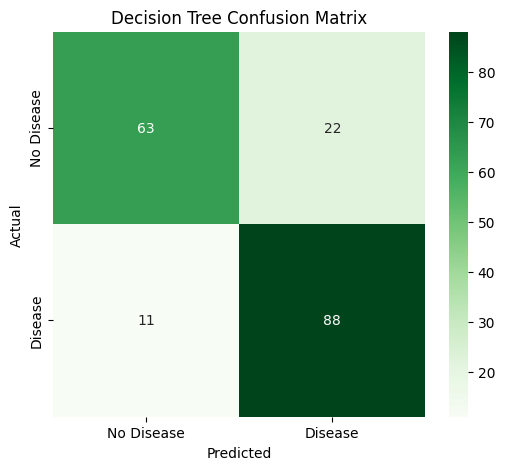

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = cm.ravel()

# Print values
print("TP:", tp, "TN:", tn, "FP:", fp, "FN:", fn)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease','Disease'], yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


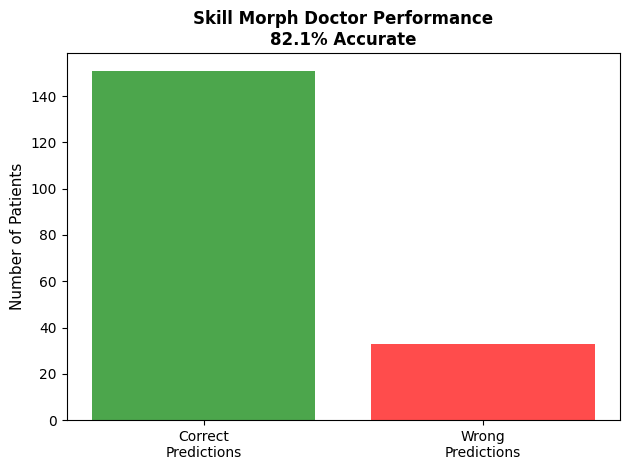

In [ ]:
# Accuracy visualization
plt.subplot()
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['Green', 'Red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1-Score')])

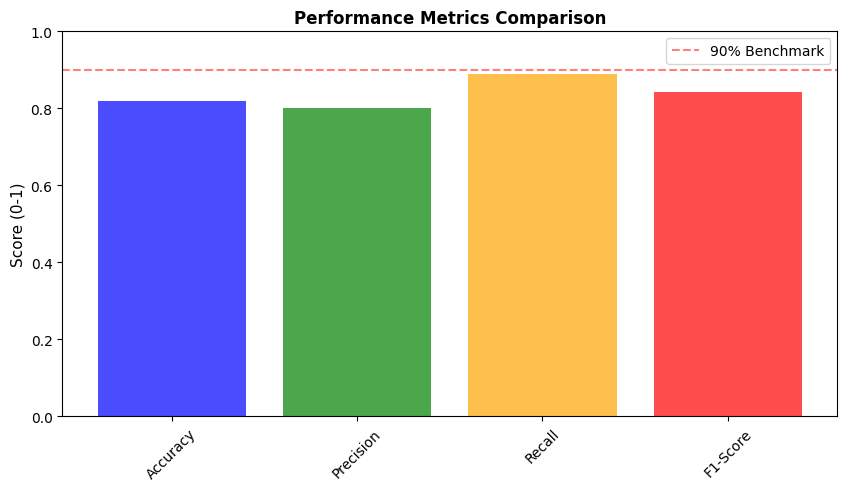

In [ ]:
# Calculate detailed metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


# Create detailed metrics visualization
plt.figure(figsize=(10, 5))

# Subplot 1: Metrics comparison
plt.subplot()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()
plt.xticks(rotation=45)





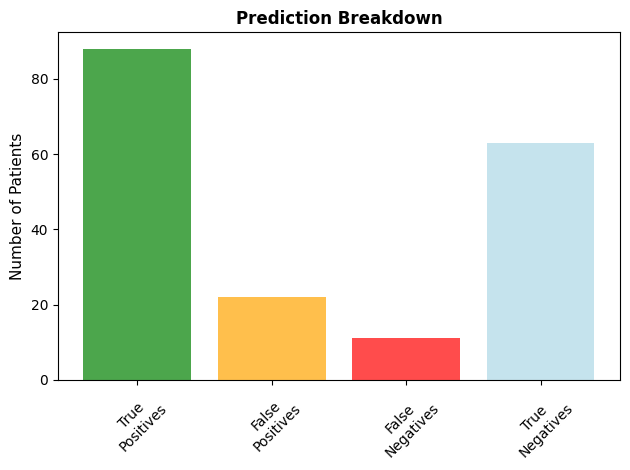

In [ ]:
# Subplot 2: Precision vs Recall visualization
plt.subplot()
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ROC-AUC Score: 0.7800950683303626


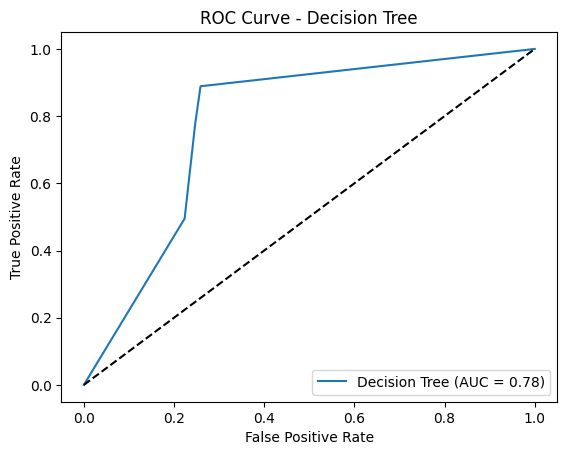

In [ ]:
roc_auc = roc_auc_score(y_test, prediction_probabilities)
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (AUC = %.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()




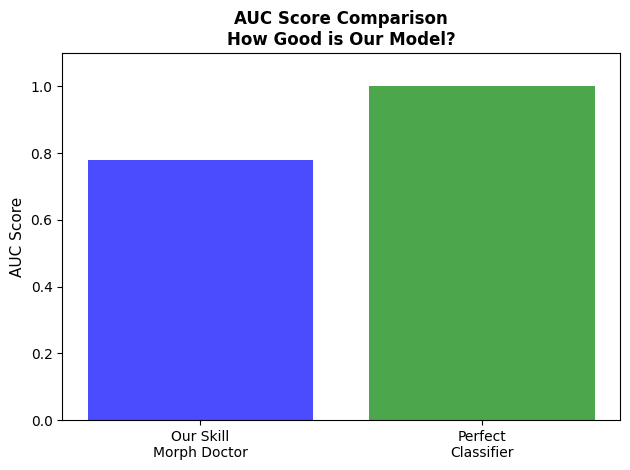

In [ ]:
# Subplot 2: AUC Comparison
plt.subplot()
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()